خضر حسون

السنة الرابعة

شبكات ونظم تشغيل

Lab 4 - Video Compression

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import ast
from scipy.interpolate import interp1d
from google.colab.patches import cv2_imshow

In [24]:

# the old functions ....... img compression...

def img_to_blocks(img, block_size):
    h = img.shape[0]
    w = img.shape[1]
    v_blocks = np.vsplit(img, h/block_size)
    h_blocks=[]
    for vb in v_blocks:
        h_blocks += np.hsplit(vb, w/block_size)
    return h_blocks



def img_from_blocks(img_blocks, img_width):
    width_blocks = int(img_width / 8)
    img_rows = []
    while(len(img_blocks)>0):
        img_rows.append(np.hstack((img_blocks[:width_blocks])))
        del img_blocks[:width_blocks]
    new_img = np.vstack(img_rows)
    return new_img

Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
              [12, 12, 14, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 69, 56],
              [14, 17, 22, 29, 51, 87, 80, 62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113, 92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100, 130, 99]])


def read_image(path):
    coloredImage = cv2.imread(path)
    print("Height", coloredImage.shape[0])
    print("Width", coloredImage.shape[1])
    print("Channels", coloredImage.shape[2])# it should be  3 for RGB 😁
    img_gray = cv2.cvtColor(coloredImage, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('gray_football.jpg', img_gray)
    cv2_imshow(img_gray)

def Quantization(quality_factor):
    sf = 0 # scaling factor 📉
    if (quality_factor >= 50):
        sf = (100 - quality_factor)/50
    else:
        sf = 50 / quality_factor
    QuantizedArray  = np.round(Q * sf)
    return QuantizedArray
def compressGrayImage(img_gray, quailty_factor):

    new_blocks = img_to_blocks(img_gray, 8)
    DCT = []
    for block in new_blocks:
        block = block.astype(np.float32)#يمكن خطأ لازم np.float32(block)  اسأل الاستاذ
        DCT.append(cv2.dct(block))
    QuantizedArray = Quantization(quailty_factor)
    Quantizied_blocks = []
    for block in DCT:
        Quantizied_blocks.append(np.round(block/QuantizedArray))
    Quantizied_blocks_copy = Quantizied_blocks.copy()#لان انا ما بدي احفظها

    ImgAfterQuanazation = img_from_blocks(Quantizied_blocks_copy, img_gray.shape[1])
    zeroPercentage = 1 - ((np.count_nonzero(ImgAfterQuanazation))/(ImgAfterQuanazation.shape[0] * ImgAfterQuanazation.shape[1]))
    IDCT = []
    for q_block in Quantizied_blocks:
        IDCT.append(cv2.idct(q_block))
    new_image = img_from_blocks(IDCT, img_gray.shape[1])
    cv2.imwrite('new_image.jpg', new_image)
    img_min = np.amin(new_image)
    img_max = np.amax(new_image)

        #لازم نعمل mapping
    f = interp1d ([img_min, img_max], [0,255])
    restored_img_scaled = f(new_image)
    restored_img_scaled = np.uint8(restored_img_scaled)
    #cv2.imwrite('new_image.jpg', restored_img_scaled)


    return restored_img_scaled









In [11]:

cap = cv2.VideoCapture("./sample.avi")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))#مافي داعي للا انتجر هون ؟؟؟؟؟؟
fps = cap.get(cv2.CAP_PROP_FPS)

print("frame width: " + str(width))
print("frame height: " + str(height))
print("frame count: " + str(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frame per second: " + str(fps))

cap.release()





frame width: 320
frame height: 240
frame count: 218.0
frame per second: 30.0


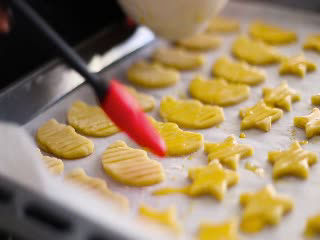

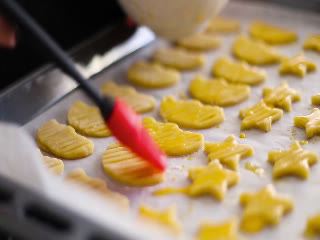

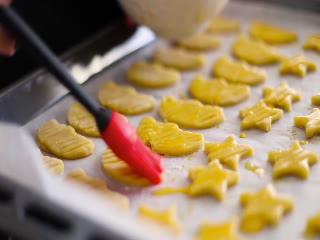

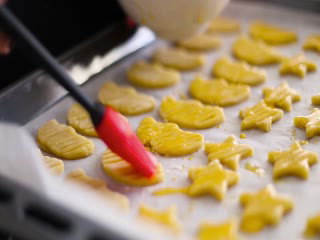

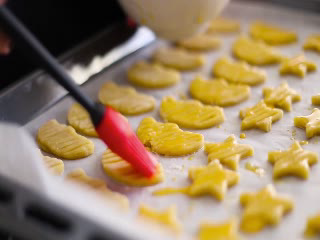

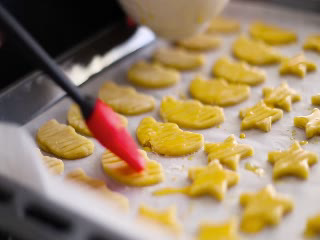

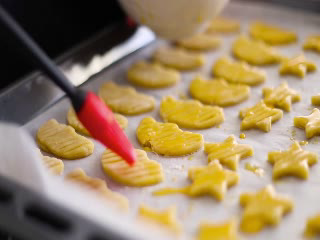

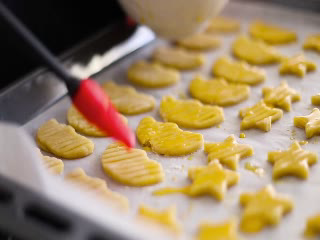

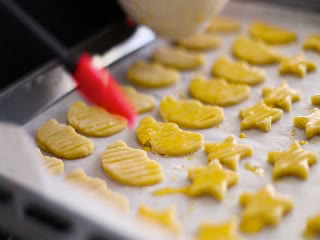

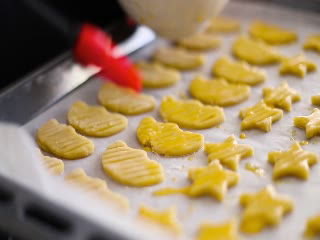

In [16]:
cap = cv2.VideoCapture("./sample.avi")
if not cap.isOpened():
    print(" Bla Bla Bla ...")

for i in range(10):
    ret, frame = cap.read()
    cv2_imshow(frame)
    cv2.waitKey(500)
cap.release()






In [18]:
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
output1=cv2.VideoWriter('new_stupied_video.avi',fourcc,fps,(width, height),isColor=False)


cap = cv2.VideoCapture("./sample.avi")

if not cap.isOpened():
    print("cannot open.........")

i = 0
while(True):
    ret, frame = cap.read()
    i+=1
    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    output1.write(gray_frame)

cap.release()
output1.release()




In [25]:
def getCompressionRatio(uncomp_file,com_file):
    uncomp_size = os.path.getsize(uncomp_file)
    comp_size = os.path.getsize(com_file)
    return (uncomp_size / comp_size)

cap=cv2.VideoCapture("sample.avi")
fourcc=cv2.VideoWriter_fourcc('M','J','P','G')
output1=cv2.VideoWriter('new_stupied_video.avi',fourcc,fps,(width,height),isColor=False)
if not cap.isOpened():
    print(" Bla Bla Bla ...")
i = 0
while(True):
    ret, frame = cap.read()
    i+=1
    if not ret:
        break
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    compressed=compressGrayImage(gray_image,15)
    output1.write(compressed)

output1.release()
print(getCompressionRatio("sample.avi","new_stupied_video.avi"))



3.081399772622605
